# This note book is used for plotting graphs of TR/DTR test results.
## Initialization

In [1]:
import os
import pandas as pd
from safedigital import temperature as TR
import seaborn as sns
sns.set(color_codes=True)
os.chdir('../')
curDirectory = os.getcwd()
print(curDirectory)

C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics


## 20220202

                    Time              Time.1  Unit1_A_T  Unit1_B_T  Unit1_C_T  \
0    02.02.2022 08:51:35 1900-01-01 00:00:00       20.5       20.6       20.5   
1    02.02.2022 08:52:05 1900-01-01 00:00:30       20.5       20.6       20.5   
2    02.02.2022 08:52:35 1900-01-01 00:01:00       20.5       20.6       20.5   
3    02.02.2022 08:53:05 1900-01-01 00:01:30       20.5       20.6       20.5   
4    02.02.2022 08:53:35 1900-01-01 00:02:00       20.5       20.6       20.5   
..                   ...                 ...        ...        ...        ...   
854  02.02.2022 15:58:35 1900-01-01 07:07:00       46.4       50.3       49.1   
855  02.02.2022 15:59:05 1900-01-01 07:07:30       46.4       50.3       49.1   
856  02.02.2022 15:59:35 1900-01-01 07:08:00       46.4       50.3       49.1   
857  02.02.2022 16:00:05 1900-01-01 07:08:30       46.4       50.3       49.1   
858  02.02.2022 16:00:35 1900-01-01 07:09:00       46.4       50.3       49.1   

     Env_T  T-01-L1  T-02-L

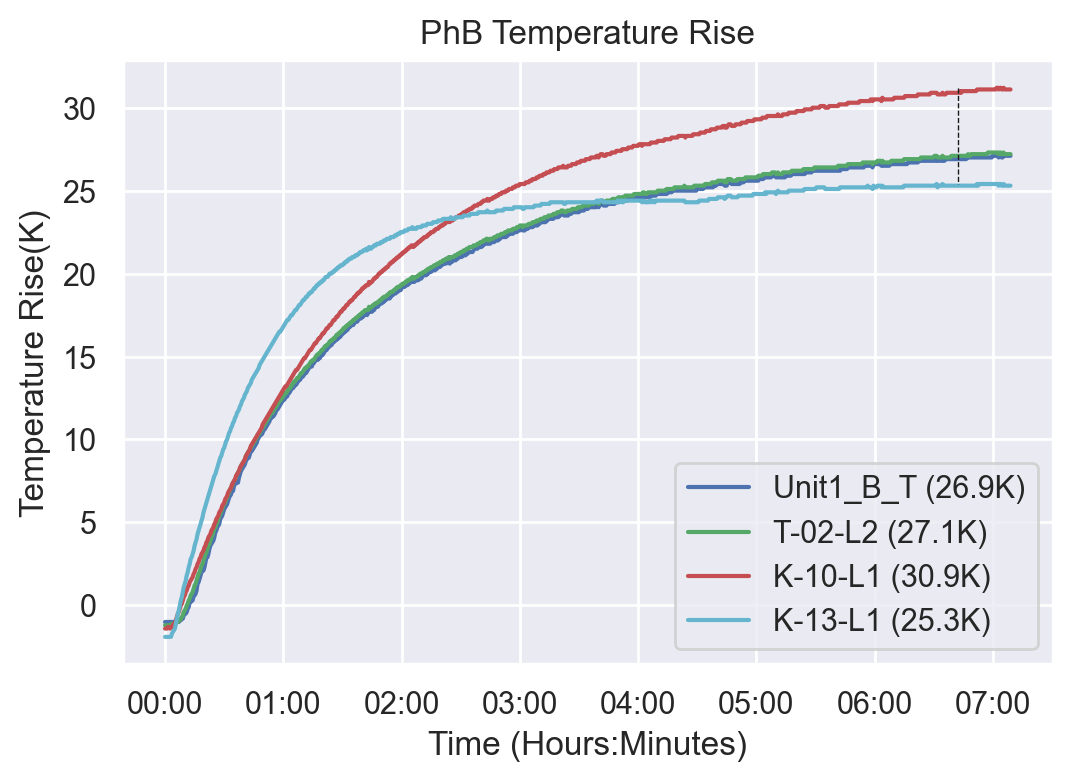

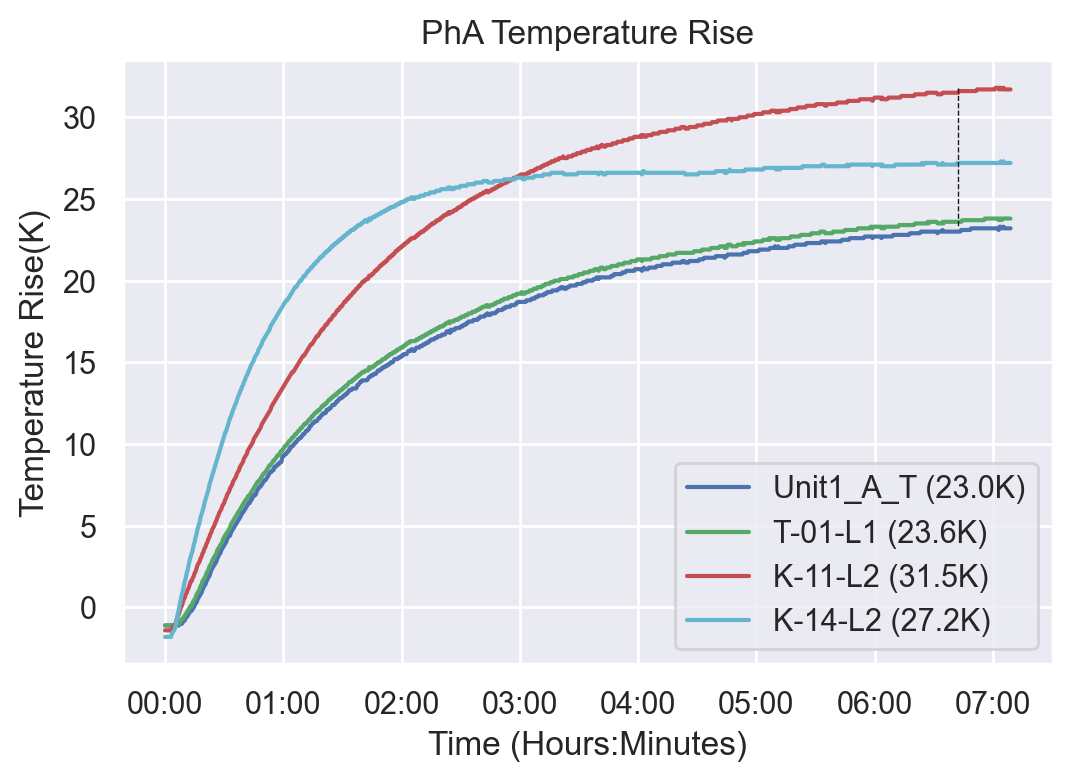

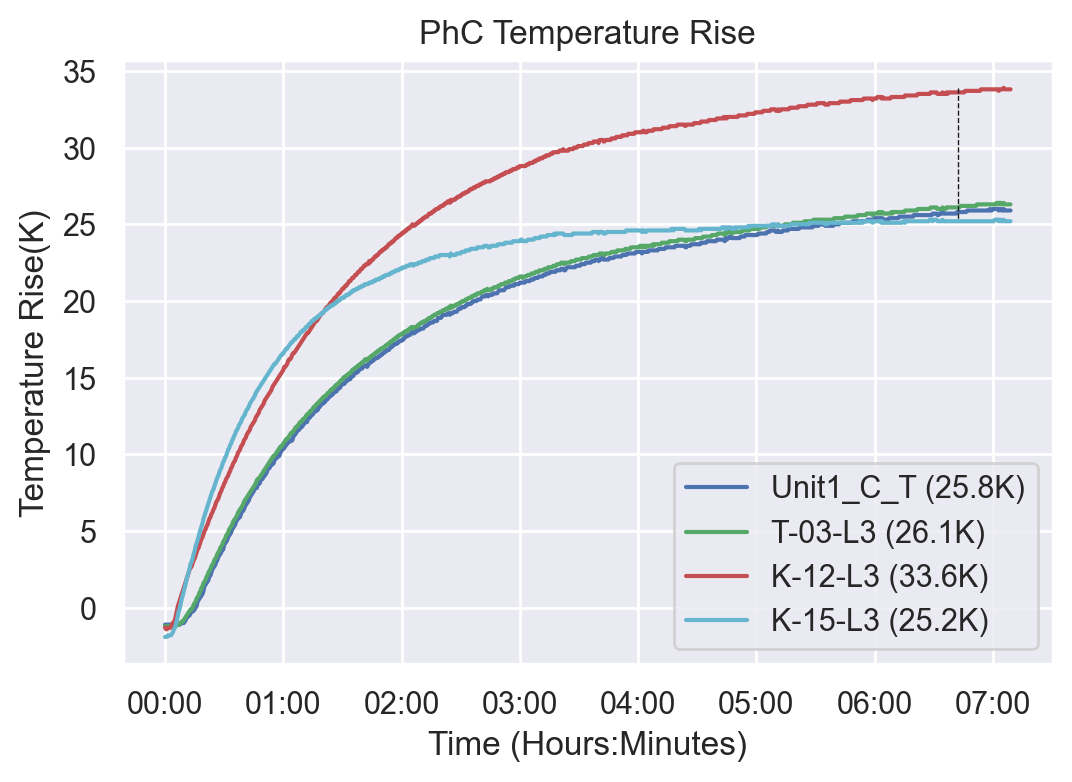

In [2]:
file_name = 'STE202_20220202_DataExportWithAmb.csv'
file_path = curDirectory + '\\07_Test from other lab\\Norway Lab\\20220202\\' + file_name
case_20220202 = TR.TempRiseExperiment_Norway()
case_20220202.read_data_special(file_path)
print(case_20220202.data)
case_20220202.find_balance_index()
print(case_20220202.bal_idx)
case_20220202.tr_plot_0202(['Unit1_B_T','T-02-L2','K-10-L1','K-13-L1'],title='PhB Temperature Rise')
case_20220202.tr_plot_0202(['Unit1_A_T','T-01-L1','K-11-L2','K-14-L2'],title='PhA Temperature Rise')
case_20220202.tr_plot_0202(['Unit1_C_T','T-03-L3','K-12-L3','K-15-L3'],title='PhC Temperature Rise')


## 20220303

0     2022-03-03 12:52:21
1     2022-03-03 12:52:51
2     2022-03-03 12:53:21
3     2022-03-03 12:53:51
4     2022-03-03 12:54:21
              ...        
650   2022-03-03 18:17:30
651   2022-03-03 18:18:00
652   2022-03-03 18:18:30
653   2022-03-03 18:19:00
654   2022-03-03 18:19:30
Name: datetime, Length: 655, dtype: datetime64[ns]
logger started from 12:52:21
i =  654
logger ended at 18:19:30
(654, 21)
(1015, 49)
sensor & couplers common start time =  2022-03-03 12:52:21
sensor & couplers common end time = 2022-03-03 18:19:00
number of duplicated index is :  1
0th group of data has discontinued points
number of duplicated index is :  1
1th group of data has no discontinued points
sensor & couplers common start index : 1
sensor & couplers common end index : 654
['T-01-L1', 'T-02-L2', 'T-03-L3', 'K-01-L1', 'K-02-L2', 'K-03-L3', 'K-04-L1', 'K-05-L2', 'K-06-L3', 'K-07-L1', 'K-08-L2', 'K-09-L3', 'T-04-L1', 'T-05-L2', 'T-06-L3', 'K-11-L1', 'K-12-L2', 'K-13-L3', 'K-14-L1', 'K-15-L2', 'K-1

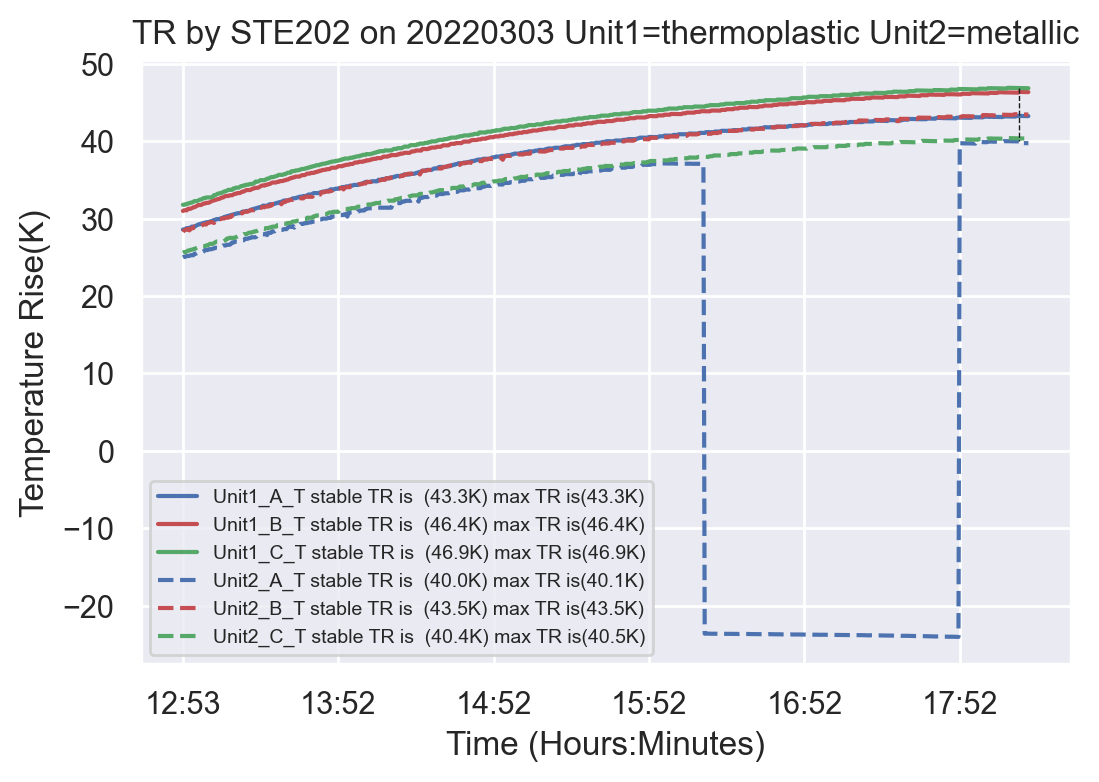

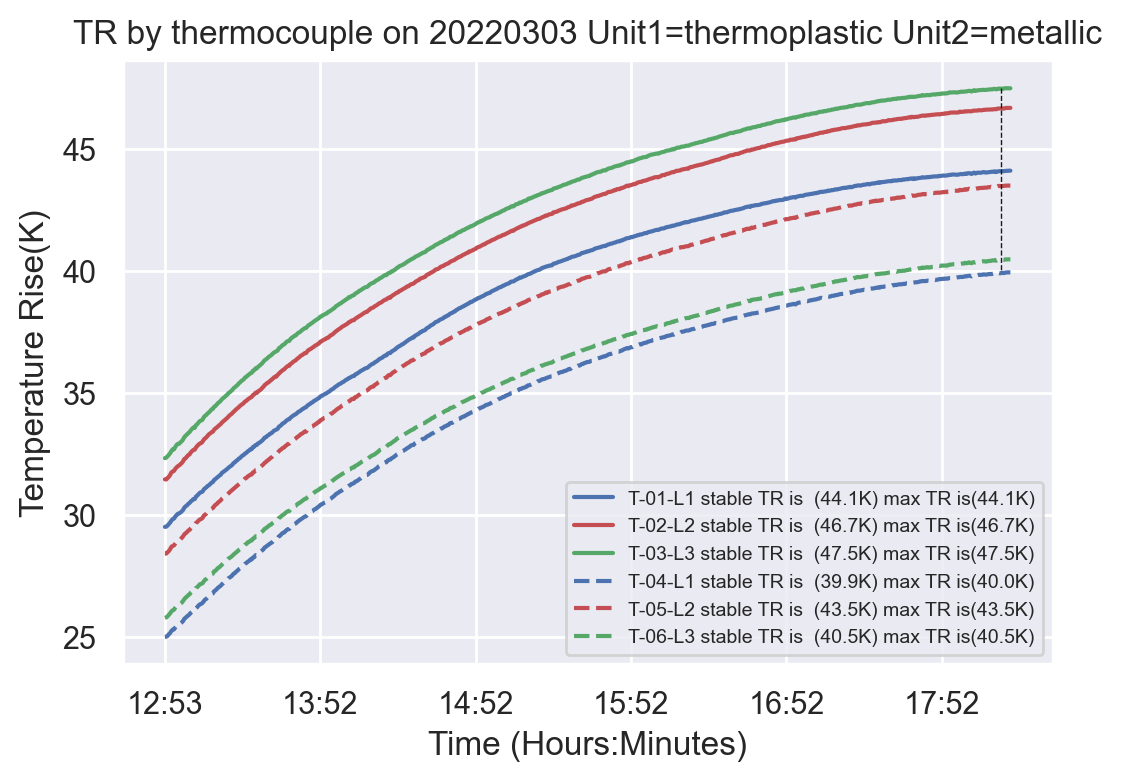

In [8]:
test_date = '20220303'  # test date
folder = curDirectory + '\\' + '07_Test from other lab\\Norway Lab' + '\\' + test_date # data folder
file_name_logger = 'MDC4_M_TR_Data_' + test_date  + '.csv' # file name of logger
file_name_couple = 'ExportedTestData_' + test_date  + '.csv' # file name of thermocouples
path_logger = folder + '\\' + file_name_logger  # full path of logger
path_couple = folder + '\\' + file_name_couple  # full path of thermocouples
raw_logger = TR.DataClean_Norway.read_logger_data(path_logger)  # read data from logger
raw_couple = TR.DataClean_Norway.read_couple_data(path_couple)  # read data from thermocouples
syn_log, syn_cpl = TR.DataClean_Norway.synch_logger_couple(raw_logger, raw_couple)  # synchronize the datetime stamps
syn_log = syn_log.rename(columns={'idx':'idx_log','datetime':'datetime_log',
                                  'Unit1_A_T':'Unit1_A_T_log',
                                  'Unit1_B_T':'Unit1_B_T_log',
                                  'Unit1_C_T':'Unit1_C_T_log',
                                  'Unit2_A_T':'Unit2_A_T_log',
                                  'Unit2_B_T':'Unit2_B_T_log',
                                  'Unit2_C_T':'Unit2_C_T_log'})
syn_cpl = syn_cpl.rename(columns={'idx':'idx_cpl','datetime':'datetime_cpl'})
data_clean_df = pd.concat((syn_log,syn_cpl),axis=1,join='inner')
case_20220303 = TR.TempRiseExperiment_Norway()
case_20220303.data = data_clean_df
bal_col_list = list(syn_cpl.columns[9:49])# list of columns to determine heat steady-state
print(bal_col_list)
case_20220303.find_balance_index(bal_col_list)
print(case_20220303.bal_idx)
# case_20220303.tr_plot(['Unit1_A_T','Unit1_B_T','Unit1_C_T','Unit2_A_T','Unit2_B_T','Unit2_C_T'],title='Temperature Rise')
# case_20220303.interp_data_zero('Unit2_A_T')
case_20220303.tr_plot(['Unit1_A_T','Unit1_B_T','Unit1_C_T','Unit2_A_T','Unit2_B_T','Unit2_C_T'],
                      title='TR by STE202 on 20220303 Unit1=thermoplastic Unit2=metallic',
                      line_style=['-','-','-','--','--','--'],
                      line_color=['b','r','g','b','r','g'])

case_20220303.tr_plot(['T-01-L1','T-02-L2','T-03-L3','T-04-L1','T-05-L2','T-06-L3'],
                      title='TR by thermocouple on 20220303 Unit1=thermoplastic Unit2=metallic',
                      line_style=['-','-','-','--','--','--'],
                      line_color=['b','r','g','b','r','g'])


##20220307

0      2022-03-07 08:26:02
1      2022-03-07 08:26:32
2      2022-03-07 08:27:02
3      2022-03-07 08:27:32
4      2022-03-07 08:28:02
               ...        
1011   2022-03-07 16:51:47
1012   2022-03-07 16:52:17
1013   2022-03-07 16:52:47
1014   2022-03-07 16:53:18
1015   2022-03-07 16:53:48
Name: datetime, Length: 1016, dtype: datetime64[ns]
logger started from 08:26:02
i =  1008
logger ended at 16:50:17
(1008, 21)
(1015, 49)
sensor & couplers common start time =  2022-03-07 08:26:02
sensor & couplers common end time = 2022-03-07 16:49:15
number of duplicated index is :  0
0th group of data has discontinued points
number of duplicated index is :  0
1th group of data has no discontinued points
sensor & couplers common start index : 1
sensor & couplers common end index : 1007
['T-01-L1', 'T-02-L2', 'T-03-L3', 'K-01-L1', 'K-02-L2', 'K-03-L3', 'K-04-L1', 'K-05-L2', 'K-06-L3', 'K-07-L1', 'K-08-L2', 'K-09-L3', 'T-04-L1', 'T-05-L2', 'T-06-L3', 'K-11-L1', 'K-12-L2', 'K-13-L3', 'K-14-L1', 

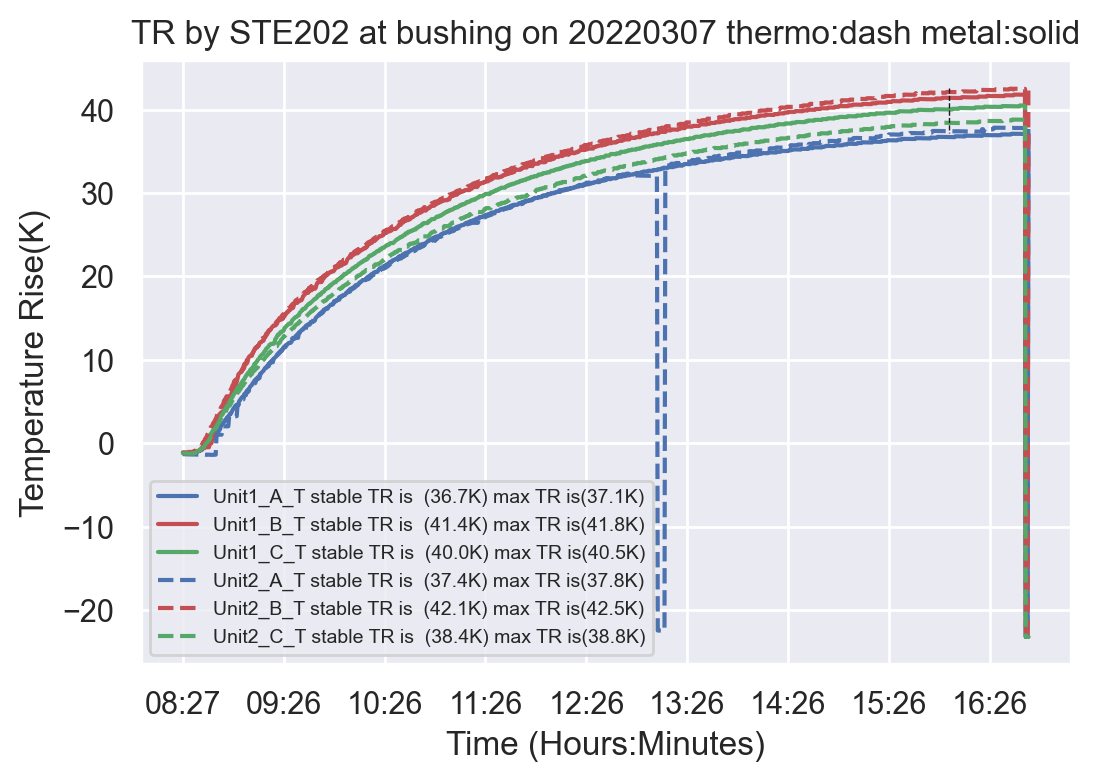

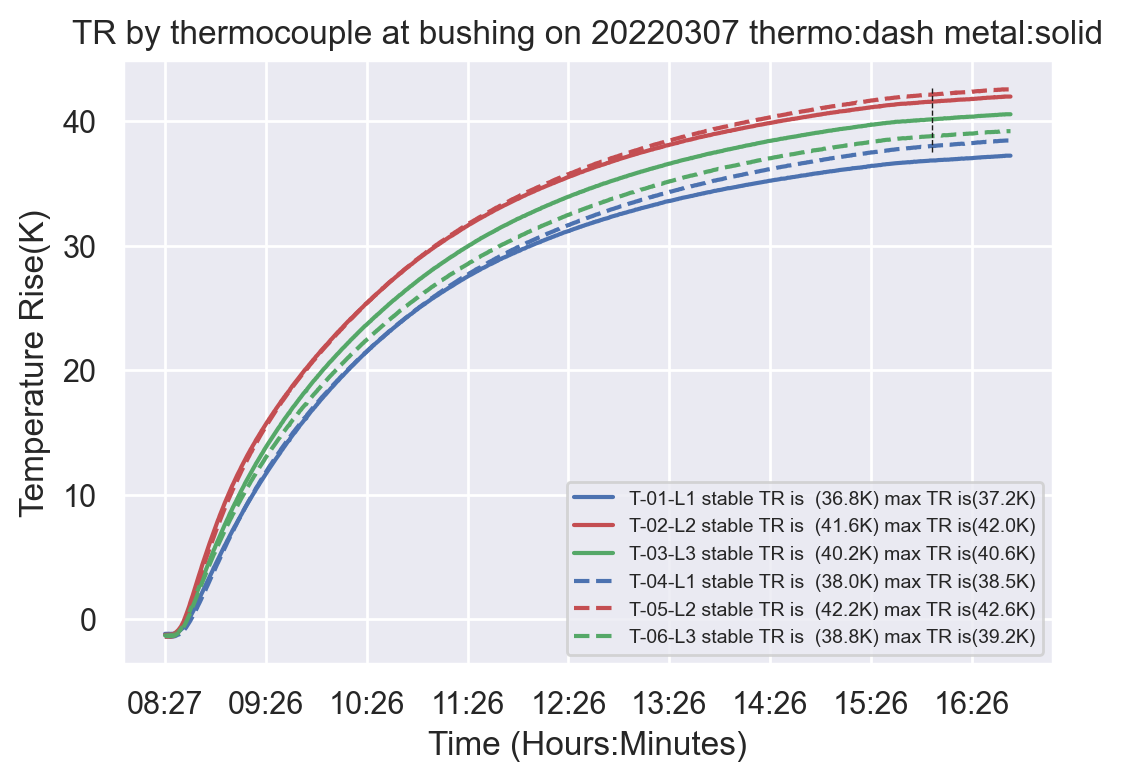

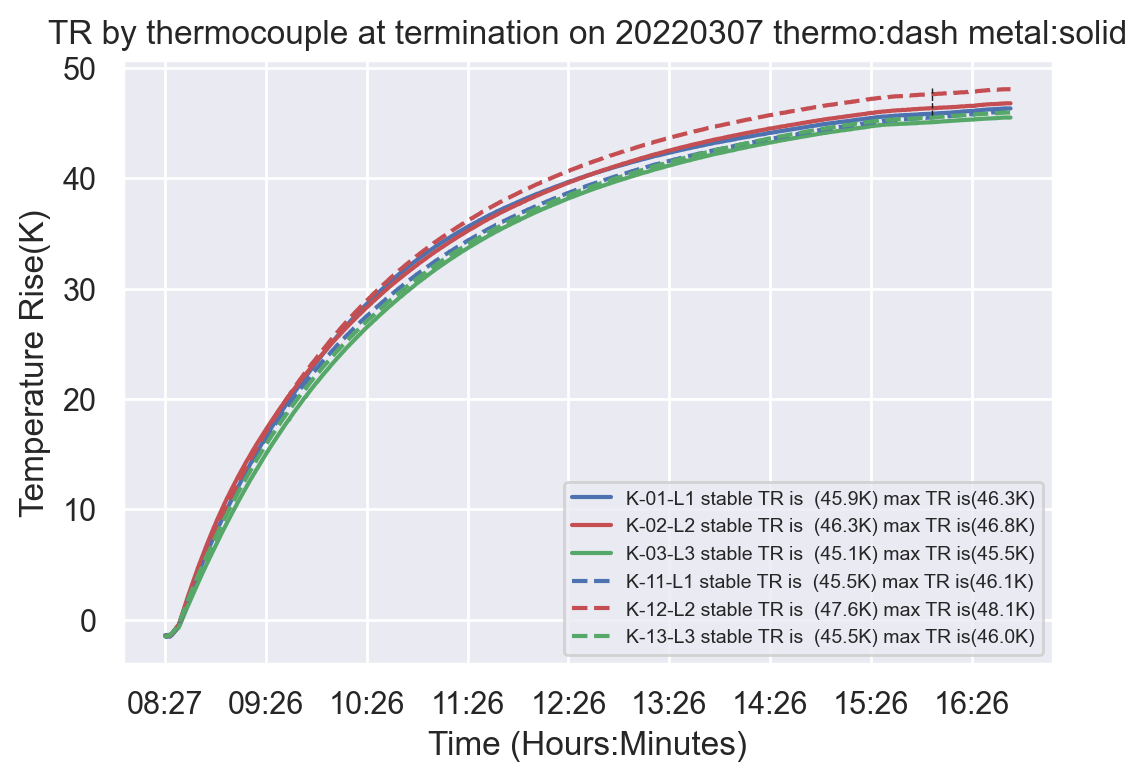

In [12]:
test_date = '20220307'  # test date
folder = curDirectory + '\\' + '07_Test from other lab\\Norway Lab' + '\\' + test_date # data folder
file_name_logger = 'MDC4_M_TR_Data_' + test_date  + '.csv' # file name of logger
file_name_couple = 'ExportedTestData_' + test_date  + '.csv' # file name of thermocouples
path_logger = folder + '\\' + file_name_logger  # full path of logger
path_couple = folder + '\\' + file_name_couple  # full path of thermocouples
raw_logger = TR.DataClean_Norway.read_logger_data(path_logger)  # read data from logger
raw_couple = TR.DataClean_Norway.read_couple_data_0307(path_couple)  # read data from thermocouples
syn_log, syn_cpl = TR.DataClean_Norway.synch_logger_couple(raw_logger, raw_couple)  # synchronize the datetime stamps
syn_log = syn_log.rename(columns={'idx':'idx_log','datetime':'datetime_log',
                                  'Unit1_A_T':'Unit1_A_T_log',
                                  'Unit1_B_T':'Unit1_B_T_log',
                                  'Unit1_C_T':'Unit1_C_T_log',
                                  'Unit2_A_T':'Unit2_A_T_log',
                                  'Unit2_B_T':'Unit2_B_T_log',
                                  'Unit2_C_T':'Unit2_C_T_log'})
syn_cpl = syn_cpl.rename(columns={'idx':'idx_cpl','datetime':'datetime_cpl'})
data_clean_df = pd.concat((syn_log,syn_cpl),axis=1,join='inner')
case_20220307 = TR.TempRiseExperiment_Norway()
case_20220307.data = data_clean_df
bal_col_list = list(syn_cpl.columns[9:49])# list of columns to determine heat steady-state
print(bal_col_list)
case_20220307.find_balance_index(bal_col_list)
print(case_20220307.bal_idx)
case_20220307.tr_plot(['Unit1_A_T','Unit1_B_T','Unit1_C_T','Unit2_A_T','Unit2_B_T','Unit2_C_T'],
                      title='TR by STE202 at bushing on 20220307 thermo:dash metal:solid',
                      line_style=['-','-','-','--','--','--'],
                      line_color=['b','r','g','b','r','g'])
case_20220307.tr_plot(['T-01-L1','T-02-L2','T-03-L3','T-04-L1','T-05-L2','T-06-L3'],
                      title='TR by thermocouple at bushing on 20220307 thermo:dash metal:solid',
                      line_style=['-','-','-','--','--','--'],
                      line_color=['b','r','g','b','r','g'])
case_20220307.tr_plot(['K-01-L1','K-02-L2','K-03-L3','K-11-L1','K-12-L2','K-13-L3'],
                      title='TR by thermocouple at termination on 20220307 thermo:dash metal:solid',
                      line_style=['-','-','-','--','--','--'],
                      line_color=['b','r','g','b','r','g'])
# case_20220307.interp_data_zero('Unit1_A_T')
# case_20220307.interp_data_zero('Unit1_B_T')
# case_20220307.interp_data_zero('Unit1_C_T')
# case_20220307.interp_data_zero('Unit2_A_T')
# case_20220307.interp_data_zero('Unit2_B_T')
# case_20220307.interp_data_zero('Unit2_C_T')
# case_20220307.tr_plot(['Unit1_A_T','Unit1_B_T','Unit1_C_T','Unit2_A_T','Unit2_B_T','Unit2_C_T'],title='Temperature Rise')

##20220322

0      2022-03-22 08:02:45
1      2022-03-22 08:03:15
2      2022-03-22 08:03:45
3      2022-03-22 08:04:15
4      2022-03-22 08:04:45
               ...        
1052   2022-03-22 16:48:55
1053   2022-03-22 16:49:25
1054   2022-03-22 16:49:55
1055   2022-03-22 16:50:25
1056   2022-03-22 16:50:55
Name: datetime, Length: 1057, dtype: datetime64[ns]
logger started from 08:13:15
test data are not fully recorded
(1036, 21)
(1045, 49)
sensor & couplers common start time =  2022-03-22 08:13:15
sensor & couplers common end time = 2022-03-22 16:49:44
number of duplicated index is :  0
0th group of data has discontinued points
number of duplicated index is :  0
1th group of data has no discontinued points
sensor & couplers common start index : 1
sensor & couplers common end index : 1033
['T-01-L1', 'T-02-L2', 'T-03-L3', 'K-01-L1', 'K-02-L2', 'K-03-L3', 'K-04-L1', 'K-05-L2', 'K-06-L3', 'K-07-L1', 'K-08-L2', 'K-09-L3', 'T-04-L1', 'T-05-L2', 'T-06-L3', 'K-11-L1', 'K-12-L2', 'K-13-L3', 'K-14-L1', 'K

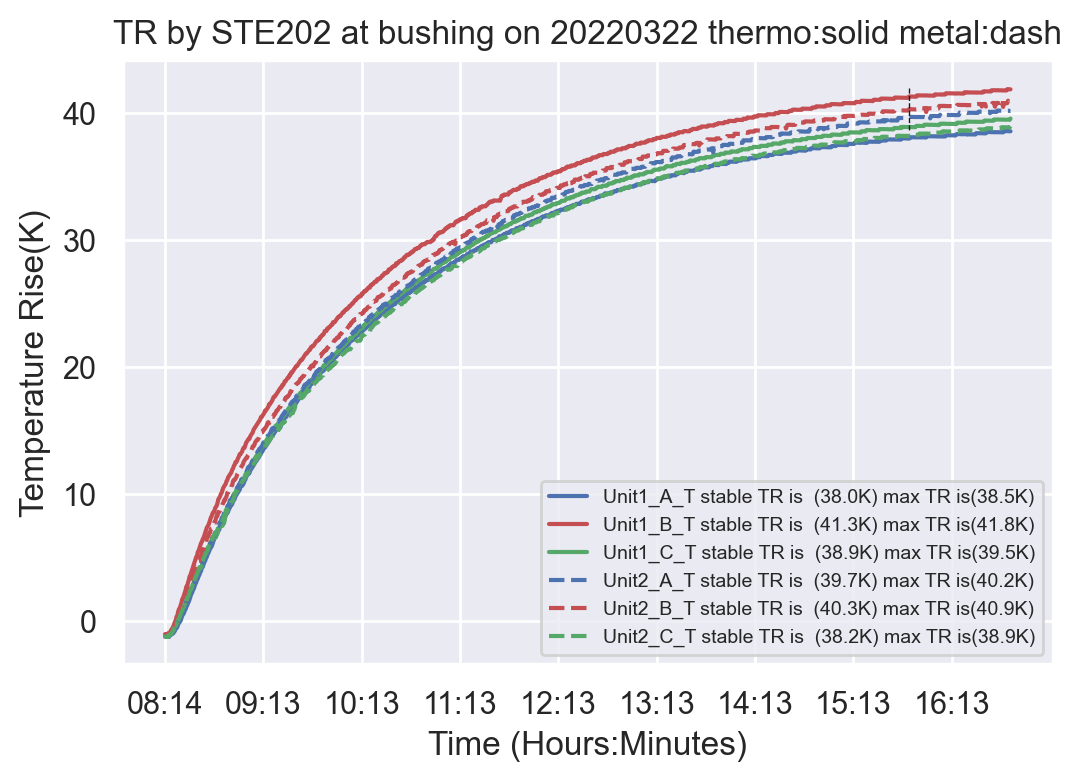

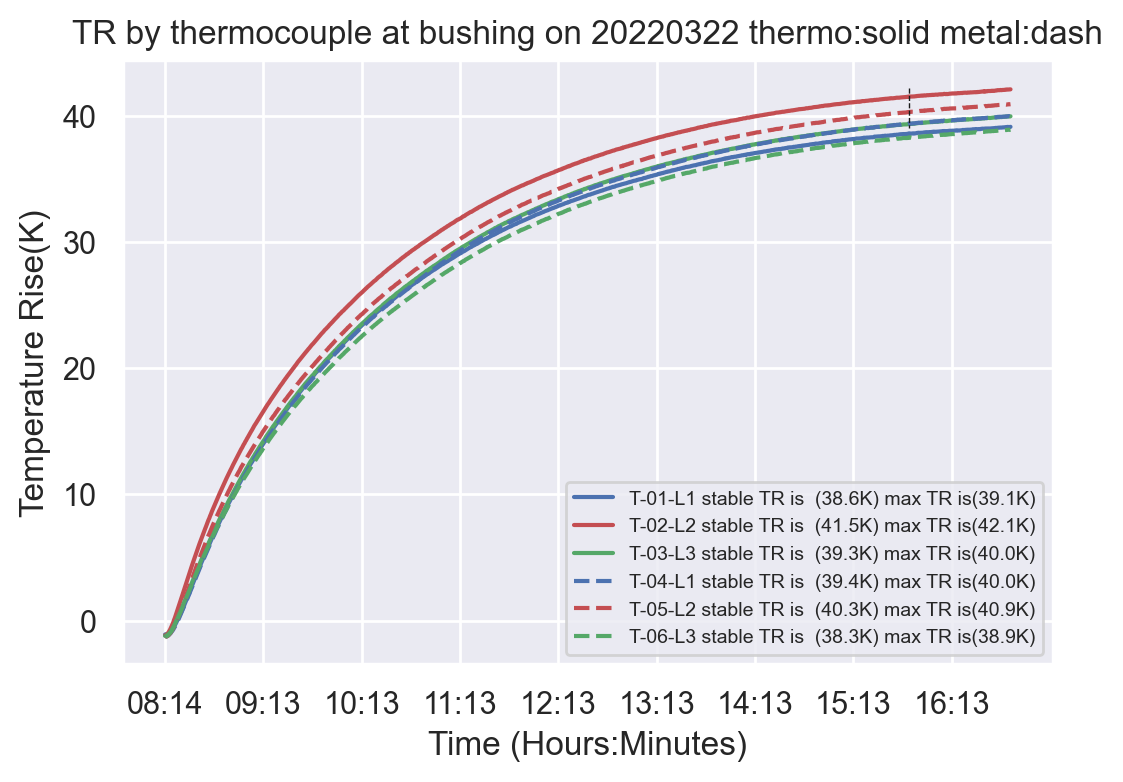

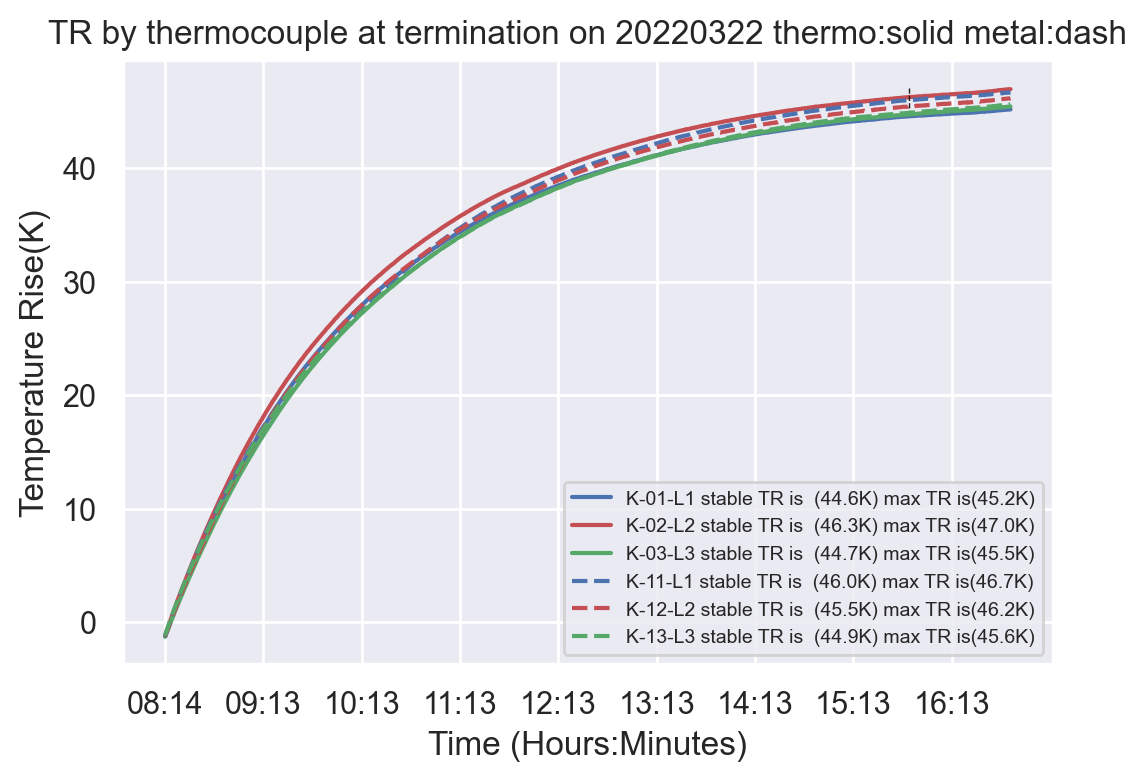

In [16]:
test_date = '20220322'  # test date
folder = curDirectory + '\\' + '07_Test from other lab\\Norway Lab' + '\\' + test_date # data folder
file_name_logger = 'MDC4_M_TR_Data_' + test_date  + '.csv' # file name of logger
file_name_couple = 'ExportedTestData_' + test_date  + '.csv' # file name of thermocouples
path_logger = folder + '\\' + file_name_logger  # full path of logger
path_couple = folder + '\\' + file_name_couple  # full path of thermocouples
raw_logger = TR.DataClean_Norway.read_logger_data(path_logger)  # read data from logger
raw_couple = TR.DataClean_Norway.read_couple_data_0307(path_couple)  # read data from thermocouples
syn_log, syn_cpl = TR.DataClean_Norway.synch_logger_couple(raw_logger, raw_couple)  # synchronize the datetime stamps
syn_log = syn_log.rename(columns={'idx':'idx_log','datetime':'datetime_log',
                                  'Unit1_A_T':'Unit1_A_T_log',
                                  'Unit1_B_T':'Unit1_B_T_log',
                                  'Unit1_C_T':'Unit1_C_T_log',
                                  'Unit2_A_T':'Unit2_A_T_log',
                                  'Unit2_B_T':'Unit2_B_T_log',
                                  'Unit2_C_T':'Unit2_C_T_log'})
syn_cpl = syn_cpl.rename(columns={'idx':'idx_cpl','datetime':'datetime_cpl'})
data_clean_df = pd.concat((syn_log,syn_cpl),axis=1,join='inner')
case = TR.TempRiseExperiment_Norway()
case.data = data_clean_df
bal_col_list = list(syn_cpl.columns[9:49])# list of columns to determine heat steady-state
print(bal_col_list)
case.find_balance_index(bal_col_list)
print(case.bal_idx)
case.tr_plot(['Unit1_A_T','Unit1_B_T','Unit1_C_T','Unit2_A_T','Unit2_B_T','Unit2_C_T'],
                      title='TR by STE202 at bushing on 20220322 thermo:solid metal:dash',
                      line_style=['-','-','-','--','--','--'],
                      line_color=['b','r','g','b','r','g'])
case.tr_plot(['T-01-L1','T-02-L2','T-03-L3','T-04-L1','T-05-L2','T-06-L3'],
                      title='TR by thermocouple at bushing on 20220322 thermo:solid metal:dash',
                      line_style=['-','-','-','--','--','--'],
                      line_color=['b','r','g','b','r','g'])
case.tr_plot(['K-01-L1','K-02-L2','K-03-L3','K-11-L1','K-12-L2','K-13-L3'],
                      title='TR by thermocouple at termination on 20220322 thermo:solid metal:dash',
                      line_style=['-','-','-','--','--','--'],
                      line_color=['b','r','g','b','r','g'])
# case_20220307.interp_data_zero('Unit1_A_T')
# case_20220307.interp_data_zero('Unit1_B_T')
# case_20220307.interp_data_zero('Unit1_C_T')
# case_20220307.interp_data_zero('Unit2_A_T')
# case_20220307.interp_data_zero('Unit2_B_T')
# case_20220307.interp_data_zero('Unit2_C_T')
# case_20220307.tr_plot(['Unit1_A_T','Unit1_B_T','Unit1_C_T','Unit2_A_T','Unit2_B_T','Unit2_C_T'],title='Temperature Rise')